## Customer Segmentation

### Background, Problem Statement & Objective

- Retailkart.com is a small and medium-scale organization that majorly deals in wine, fruit and meat products, having held around 35% market share.
- The company has been leading the domain offline for a long time.
- The company main challenge is to stay competitive against the rapidly expanding companies offering quick and free deliveries while still accepting online purchases at affordable costs
- The company’s near-term objective is to maintain its overall market share, with the increasing competition offering 10-minute delivery, among other benefits.

__Identify customer groups which have different purchasing preferences based on their affluence and other attributes and devise an effective marketing plan & preference-based user experience at a cohort/group level.__

### <strong><span style="color:brown">Importing Libraries and Data</span></strong>

#### Import Libraries, Suppress Warnings and Set Display

In [153]:
# import require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [154]:
#Environment settings

pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

#### Read the Data

In [155]:
retail_df = pd.read_csv("CustomerPurchaseData.csv")

In [156]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,3,11,0.0


### <strong><span style="color:brown"> Inspecting the Dataframe</span></strong>

In [157]:
retail_df.shape

(2239, 29)

<font color="blue">retail_df has 2239 rows and 29 columns</font>

In [158]:
retail_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

<font color="blue">
    Income column is having one and Response column is having few null values <br> Dt_Customer is an object (should be 'datetime64' )

</font>

In [159]:
retail_df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntSnacksProds          213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1976
ID                     2238
dtype: int64

### <strong><span style="color:brown"> Data Cleaning</span></strong>

#### Check Missing Values

In [160]:
retail_df.isnull().sum().sort_values(ascending=False)

Response               23
Income                  1
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
ID                      0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
MntSnacksProds          0
dtype: int64

<font color="blue"> We can deal with the missing values in the ‘Income’ column by imputing 0, as the ‘Income’ column has only one missing value </font>

#### Imputing missing values

In [161]:
# Imputing missing value in column Income by 0

retail_df['Income'] = retail_df['Income'].fillna(0)

<font color="blue"> ‘Response’ column has many missing values. Deleting them might will affect the end result. Therefore, it is advisable to replace null values with an approximation of whether the customer has accepted any campaigns at a later stage or not. This means that if a customer has responded in any of the campaigns, we will replace it by 1 or else 0 </font>

Lets first check count of 1's, 0's and NaN in column 'Response'

In [162]:
response_counts = retail_df['Response'].value_counts(dropna=False)
print(response_counts)

0.0    1883
1.0     333
NaN      23
Name: Response, dtype: int64


In [163]:
# List of campaign columns
campaign_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Replace missing values in 'Response' column based on campaign responses
retail_df['Response'] = retail_df.apply(lambda row: 1 if pd.isnull(row['Response']) and any(row[campaign_columns]) else (0 if pd.isnull(row['Response']) else row['Response']), axis=1)

In [164]:
response_counts = retail_df['Response'].value_counts(dropna=False)
print(response_counts)

0.0    1902
1.0     337
Name: Response, dtype: int64


In [165]:
# Lets check the data set again for missing values

retail_df.isnull().sum().sort_values(ascending=False)

ID                     0
NumDealsPurchases      0
Z_Revenue              0
Z_CostContact          0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntSnacksProds         0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Response               0
dtype: int64

<font color="blue"> No more missing values in dataset </font>

#### Converting 'Dt_Customer' from object to datetime dtype

In [166]:
# Lets convert the dtype of 'Dt_Customer' to datetime datatype

retail_df['Dt_Customer'] = pd.to_datetime(retail_df.Dt_Customer)

In [167]:
# Lets check if the conversion has happened

retail_df['Dt_Customer'].dtype

dtype('<M8[ns]')

#### Dropping unwanted columns

<font color="blue"> "Z_CostContact", "Z_Revenue" have only one unique values in all rows. These two columns offer no insight and no value to analysis. Hence they will be dropped. </font>

In [168]:
# Dropping columns as they are not a key contributor for the analysis

retail_df = retail_df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0.0
1,8373,1979,Basic,Together,24594.0,1,0,2013-10-12,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0.0
3,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0.0
4,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,0.0


The dataset retail_df has now 27 columns

In [169]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0.0
1,8373,1979,Basic,Together,24594.0,1,0,2013-10-12,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0.0
3,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0.0
4,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,0.0


### <strong><span style="color:brown"> Spread of the Data & Outliers </span></strong>

In [170]:
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2239.0,9149.564538,10605.188253,0.0,3383.5,6019.0,9043.5,47392.0
Year_Birth,2239.0,1968.802144,11.985494,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2239.0,51412.799464,22069.566611,0.0,34716.0,51039.0,68277.5,162397.0
Kidhome,2239.0,0.443502,0.537513,0.0,0.0,0.0,1.0,2.0
Teenhome,2239.0,0.500223,0.543772,0.0,0.0,0.0,1.0,2.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
MntFruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0


In [171]:
retail_df.describe(include=[object]).T

,count,unique,top,freq
Education,2239,5,Graduation,1126
Marital_Status,2239,8,Married,864


<font color="blue"> DOB of customers varies from year 1893 to 1996 <br>
Number of kids is from 0 to 2 <br>
Number of teens is from 0 to 2 <br>
Highest Education is Graduation <br>
Maximum customers are Married <br>
highest income of person is 16.2k </font>

In [172]:
# Sort 'Dt_Customer' column in descending order
sorted_dates = retail_df['Dt_Customer'].sort_values(ascending=True)

print(sorted_dates)

1154   2012-01-08
420    2012-01-08
2222   2012-01-08
1340   2012-01-08
1873   2012-01-09
          ...    
103    2014-12-05
131    2014-12-05
2229   2014-12-05
1733   2014-12-05
1049   2014-12-06
Name: Dt_Customer, Length: 2239, dtype: datetime64[ns]


### Check Outliers

In [173]:
num_cols = retail_df.select_dtypes("number").columns

Creating a UDF for Identifying Outliers using Box Plot

In [174]:
# UDF for Outlier Identification using Box Plot

def Check_Outliers(data, columnList):
    num_cols = len(columnList)
    num_rows = (num_cols + 4) // 5  # To handle odd number of columns
    plt.figure(figsize=[15, 4 * num_rows])

    for i, j in enumerate(columnList):
        plt.subplot(num_rows, 5, i+1)

        sns.boxplot(y=data[j], whis=1.5)  # Adjusting the individual box plot size

        plt.ylabel(None)
        plt.title(j, fontsize=12, color='brown')  # Adjust title fontsize

    plt.tight_layout()
    plt.show()

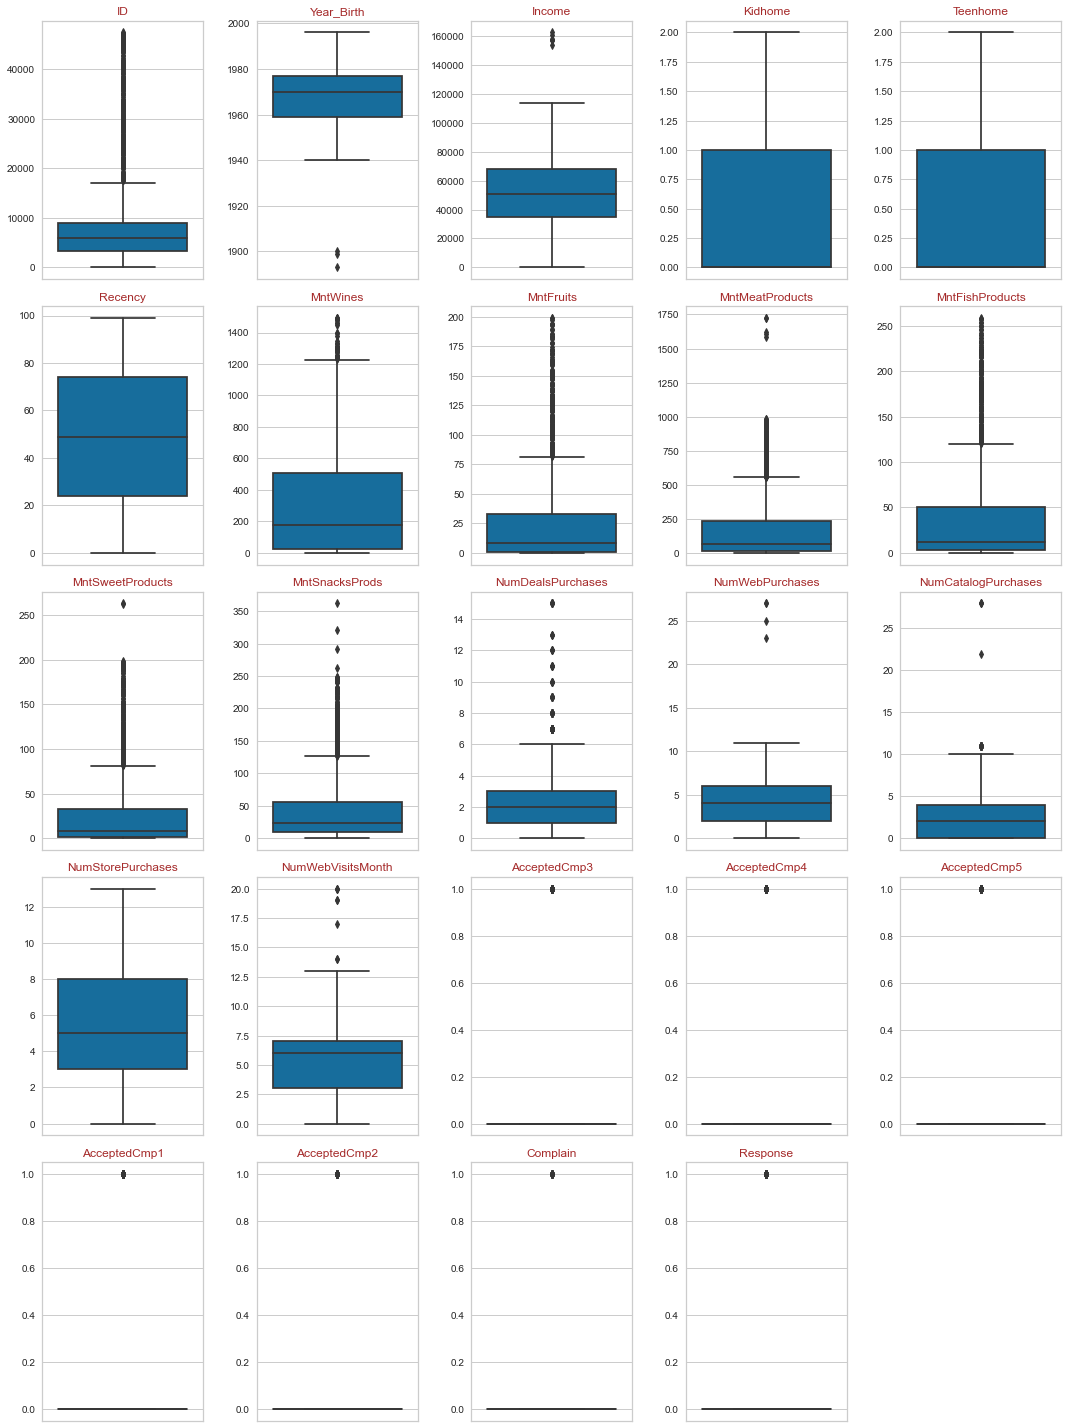

In [175]:
Check_Outliers(retail_df,num_cols)

<font color="blue"> 'Year_Birth' certainly has outliers. Lets treat them first. <br>
For that we will convert it into age.</font>

<font color="red"> The data range in Dt_Customer is from 2012 to 2014 Q4. Considering this we should consider 2015 as on date for calculating age and other features relating to it. </font>

In [176]:
retail_df['Age'] = 2015 - retail_df['Year_Birth']

In [177]:
retail_df['Age'].describe(percentiles=[0.99])

count    2239.000000
mean       46.197856
std        11.985494
min        19.000000
50%        45.000000
99%        70.000000
max       122.000000
Name: Age, dtype: float64

You cant have customers at such high age

In [178]:
retail_df['Income'].describe(percentiles=[0.99])

count      2239.000000
mean      51412.799464
std       22069.566611
min           0.000000
50%       51039.000000
99%       94384.000000
max      162397.000000
Name: Income, dtype: float64

#### Outlier Treatment

In [179]:
# Treating the Outliers at 0.99 percentile which roughly comes to 100 for Age and 100k for Income

retail_df = retail_df[(retail_df["Age"]<100)]
retail_df = retail_df[(retail_df["Income"]<100000)]

In [180]:
print("The number of rows left after removing the outliers are:", len(retail_df))

The number of rows left after removing the outliers are: 2224


In [181]:
retail_df.shape

(2224, 28)

### <strong><span style="color:brown"> EDA </span></strong>

In [182]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2238
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2224 non-null   int64         
 1   Year_Birth           2224 non-null   int64         
 2   Education            2224 non-null   object        
 3   Marital_Status       2224 non-null   object        
 4   Income               2224 non-null   float64       
 5   Kidhome              2224 non-null   int64         
 6   Teenhome             2224 non-null   int64         
 7   Dt_Customer          2224 non-null   datetime64[ns]
 8   Recency              2224 non-null   int64         
 9   MntWines             2224 non-null   int64         
 10  MntFruits            2224 non-null   int64         
 11  MntMeatProducts      2224 non-null   int64         
 12  MntFishProducts      2224 non-null   int64         
 13  MntSweetProducts     2224 non-nul

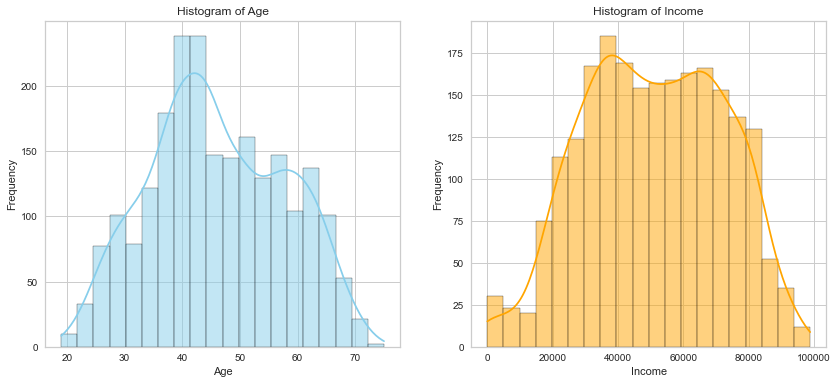

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for 'Age' column
sns.histplot(retail_df['Age'], kde=True, bins=20, edgecolor='black', color='skyblue', ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Age')
ax1.grid(True)

# Plot histogram for 'Income' column
sns.histplot(retail_df['Income'], kde=True, bins=20, edgecolor='black', color='orange', ax=ax2)
ax2.set_xlabel('Income')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Income')
ax2.grid(True)

plt.show()

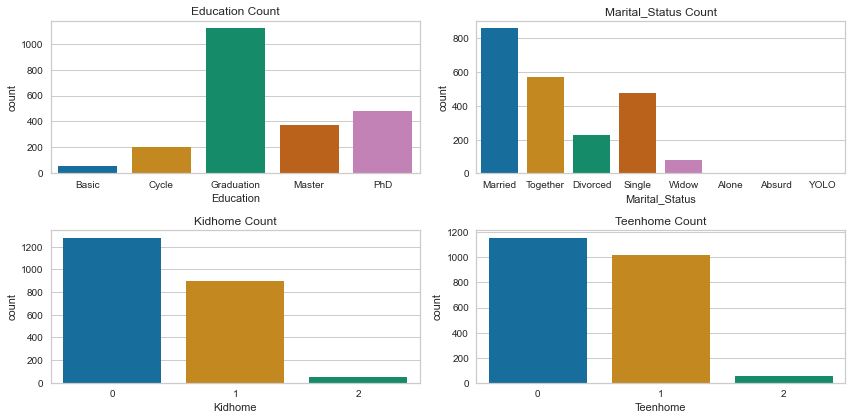

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
sns.set_palette("colorblind")

# List of column names and corresponding titles for the plots
columns = ["Education", "Marital_Status", "Kidhome", "Teenhome"]
titles = ["Education Count", "Marital_Status Count", "Kidhome Count", "Teenhome Count"]

# Loop through each column and create the count plot on the corresponding subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=retail_df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(titles[i])

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

<font color="red"> 
- Majority of the customers are Graduates followed by PhD and Masters Degree. <br>
- Customers who are married and staying together are more than divorced, single, etc. <br>
- Maximum customers dont have kids or teens at home. <br>
</font>

In [185]:
# Create a UDF for pie charts

def plot_percentage_pie_chart(data, selected_columns):
    # Calculate the percentage for each column
    percentage_df = (data[selected_columns].sum() / data[selected_columns].sum().sum()) * 100

    # Create a pie chart
    plt.figure(figsize=(4, 4))
    sns.set_palette("colorblind")
    plt.pie(percentage_df, labels=percentage_df.index, autopct='%.1f%%', startangle=140)

    # Set the title
    plt.title("Percentage of Place of Purchases")

    # Show the plot
    plt.show()

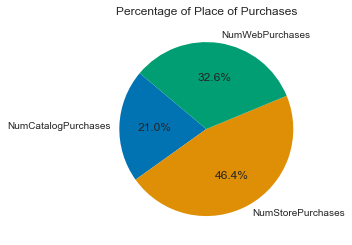

In [186]:
plot_percentage_pie_chart(retail_df, ["NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases"])

<font color="red"> 
- Majority of the customers are purcashing from the store followed by web. Which is not that bad.<br>
</font>

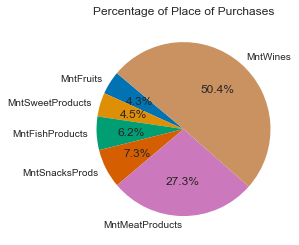

In [187]:
plot_percentage_pie_chart(retail_df, ["MntFruits", "MntSweetProducts", "MntFishProducts", "MntSnacksProds", "MntMeatProducts", "MntWines"])

<font color="red"> 
- Majority of the customers are buying Wines and Meat Products. <br>
- Very few customers are purchasing fruits and sweet products<br>
</font>

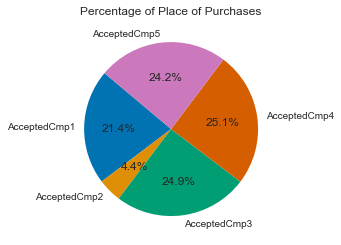

In [188]:
plot_percentage_pie_chart(retail_df, ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"])

<font color="red"> 
- Campaign 4 was the most successful followed closely by 3 and 5 <br>
</font>

### <strong><span style="color:brown"> Derive New Features </span></strong>

In [189]:
retail_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

<font color="blue"> Derive 'Total_Spent' spent on products. This will later help us in understand the total amount spent by each customer </font>

In [190]:
retail_df['Total_Spent'] = retail_df['MntWines']+ retail_df['MntFruits']+ retail_df['MntMeatProducts']+ retail_df['MntFishProducts']+ retail_df['MntSweetProducts']+ retail_df['MntSnacksProds']

<font color="blue"> Deriving 'Member_Since'in days as of 2015/1/1 .</font>

In [191]:
retail_df['DateAsOn'] = '01-01-2015'
retail_df['DateAsOn'] = pd.to_datetime(retail_df.DateAsOn)
retail_df['Member_For'] = (retail_df['DateAsOn'] - retail_df['Dt_Customer']).dt.days

In [192]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,DateAsOn,Member_For
0,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0.0,39,61,2015-01-01,779
1,8373,1979,Basic,Together,24594.0,1,0,2013-10-12,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0.0,36,29,2015-01-01,446
2,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0.0,39,29,2015-01-01,876
3,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0.0,54,43,2015-01-01,200
4,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,0.0,37,80,2015-01-01,844


<font color="blue"> Drop redundant columns .</font>

In [193]:
retail_df = retail_df.drop(columns = ['ID', 'Dt_Customer', 'Year_Birth','DateAsOn'],axis=1)
retail_df.shape

(2224, 27)

<font color="blue"> Deriving 'Total_Kids' .</font>

In [194]:
# Feature indicating total children living in customer house

retail_df['Total_Kids'] = retail_df['Kidhome'] + retail_df['Teenhome']

<font color="blue"> Deriving 'FamilySize' .</font>

In [195]:
# Feature indicating Famility Size. 
retail_df["FamilySize"] = np.where(retail_df["Marital_Status"] == "Single",
                                       retail_df["Total_Kids"] + 1,
                                       retail_df["Total_Kids"] + 2)


<font color="blue"> Deriving 'Total_Purchases' done by a customer through different channels. This will help find the percentage these channels contribute.</font>

In [196]:
retail_df['Total_Purchases']= retail_df['NumWebPurchases']+retail_df['NumCatalogPurchases']+retail_df['NumStorePurchases']
retail_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Member_For,Total_Kids,FamilySize,Total_Purchases
0,Basic,Married,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0.0,39,61,779,0,2,5
1,Basic,Together,24594.0,1,0,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0.0,36,29,446,1,3,4
2,Basic,Divorced,9548.0,1,0,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0.0,39,29,876,1,3,4
3,Basic,Married,28249.0,0,0,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0.0,54,43,200,0,2,5
4,Basic,Together,24882.0,1,0,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,0.0,37,80,844,1,3,4


<font color="blue"> Deriving 'Total_AcceptedCmp' by a customer accepted the offer in all the marketing campaigns by summing up all the “Accepted”-related columns and the “Response” column.</font>

In [197]:
retail_df['Total_AcceptedCmp']= retail_df['AcceptedCmp3'] + retail_df['AcceptedCmp4'] + retail_df['AcceptedCmp5'] + retail_df['AcceptedCmp1'] + retail_df['AcceptedCmp2'] + retail_df['Response']

<font color="blue"> Deriving New Features by Clubbing Product Categories.</font>

In [198]:
retail_df['Alcohol'] = retail_df['MntWines']

In [199]:
retail_df['Meat & Fish'] = retail_df['MntFishProducts'] + retail_df['MntMeatProducts']

In [200]:
retail_df['Snacks & Fruits'] = retail_df['MntFruits'] + retail_df['MntSnacksProds']+ retail_df['MntSweetProducts']

<font color="blue"> Create only two categories for Education - Basic as Basic_Edu and rest all as High_Edu.</font>

In [201]:
# Bucketing Education into two categories 

retail_df['Education'] = retail_df['Education'].replace(['PhD','Cycle','Graduation', 'Master'],'High_Edu')  
retail_df['Education'] = retail_df['Education'].replace(['Basic'], 'Basic_Edu')

<font color="blue"> Similarly, simplifying Marital_Status with only two categories for Education - Single or Not_Single</font>

In [202]:
retail_df['Marital_Status'] = retail_df['Marital_Status'].replace(['Married', 'Together'],'Not_Single')
retail_df['Marital_Status'] = retail_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [203]:
retail_df.nunique().sort_values()

Education                 2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
AcceptedCmp4              2
Response                  2
Complain                  2
Marital_Status            2
AcceptedCmp3              2
Teenhome                  3
Kidhome                   3
Total_Kids                4
FamilySize                5
Total_AcceptedCmp         6
NumCatalogPurchases      13
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Total_Purchases          33
Age                      56
Recency                 100
MntFruits               157
MntSweetProducts        176
MntFishProducts         182
MntSnacksProds          211
Snacks & Fruits         366
MntMeatProducts         553
Meat & Fish             603
Member_For              663
MntWines                771
Alcohol                 771
Total_Spent            1049
Income                 1961
dtype: int64

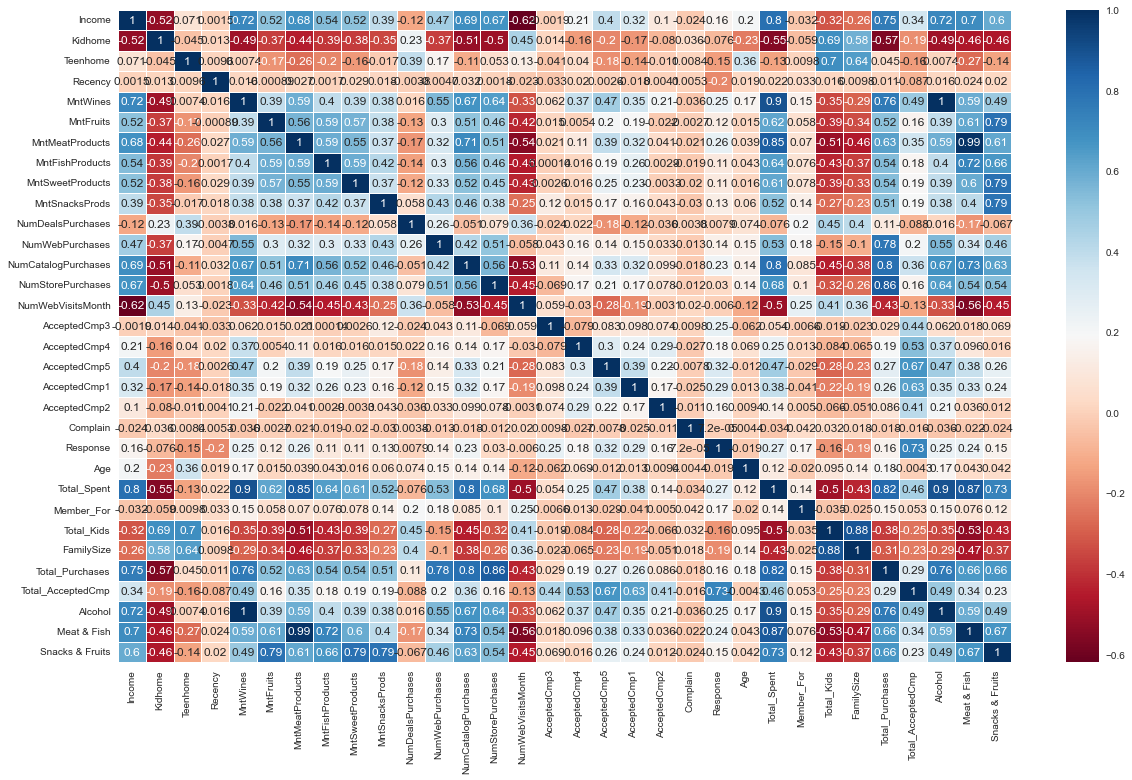

In [204]:
plt.figure(figsize=(20, 12))
sns.heatmap(retail_df.corr(), cmap='RdBu', linewidths=0.5, linecolor='white', annot=True)
plt.show()

<font color="red"> 
High Income Customers <br>
- spend more and purchase more.<br>
- visit the company’s website less frequently.<br>
- have few numbers of purchases made with a discount<br>
Customers with kids<br>
- spend less and purchase less.<br>
- have a high number of purchases made with a discount<br>
</font>

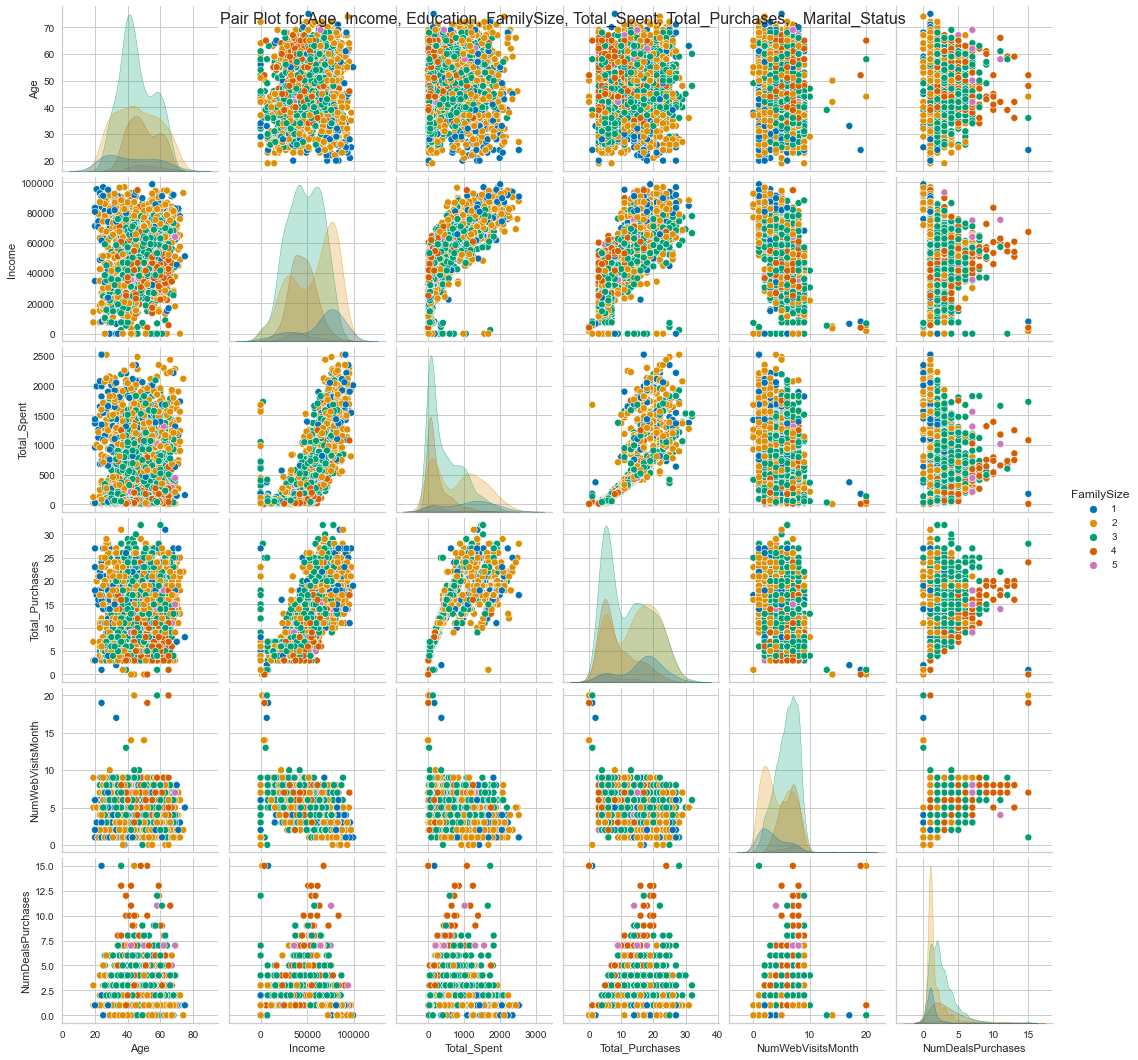

In [205]:
selected_columns = ['Age', 'Income', 'Education', 'FamilySize', 'Total_Spent', 'Total_Purchases', 'NumWebVisitsMonth', 'NumDealsPurchases']
selected_df = retail_df[selected_columns]

# Create the pair plot
sns.pairplot(selected_df, hue='FamilySize', diag_kind='kde', palette='colorblind')
plt.suptitle("Pair Plot for Age, Income, Education, FamilySize, Total_Spent, Total_Purchases, , Marital_Status", fontsize=16)
plt.show()

## Model Building

In [206]:
retail_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Member_For,Total_Kids,FamilySize,Total_Purchases,Total_AcceptedCmp,Alcohol,Meat & Fish,Snacks & Fruits
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,50944.562500,0.445144,0.502248,49.138939,304.477518,26.233813,165.299910,37.567446,26.906475,43.949640,2.324640,4.084532,2.627248,5.803507,5.340827,0.073291,0.073741,0.071043,0.062950,0.013040,0.008993,0.149730,46.113309,604.434802,537.967176,0.947392,2.732914,12.515288,0.443795,304.477518,202.867356,97.089928
std,21146.441537,0.537947,0.544051,28.946801,336.480640,39.585825,219.467827,54.639035,40.835706,51.913716,1.894616,2.732496,2.787575,3.231448,2.413194,0.260673,0.261408,0.256955,0.242927,0.113469,0.094424,0.356887,11.704017,600.847041,232.137798,0.747720,0.875351,7.153968,0.882420,336.480640,255.622319,104.617630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,34599.000000,0.000000,0.000000,24.000000,24.000000,1.750000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,366.750000,0.000000,2.000000,6.000000,0.000000,24.000000,21.000000,18.000000
50%,50884.000000,0.000000,0.000000,49.500000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.000000,539.000000,1.000000,3.000000,12.000000,0.000000,176.000000,79.000000,51.000000
75%,67911.000000,1.000000,1.000000,74.000000,504.250000,33.000000,231.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1040.500000,712.000000,1.000000,3.000000,18.000000,1.000000,504.250000,306.250000,152.000000
max,98777.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,2525.000000,1089.000000,3.000000,5.000000,32.000000,5.000000,1493.000000,1726.000000,626.000000


### Encoding categorical to numerical

In [207]:
Num_Cols = retail_df.select_dtypes("number").columns
Num_Cols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spent',
       'Member_For', 'Total_Kids', 'FamilySize', 'Total_Purchases',
       'Total_AcceptedCmp', 'Alcohol', 'Meat & Fish', 'Snacks & Fruits'],
      dtype='object')

In [208]:
Cat_Cols = retail_df.select_dtypes("object").columns
Cat_Cols

Index(['Education', 'Marital_Status'], dtype='object')

In [209]:
# Create a LabelEncoder object

label_encode = LabelEncoder()

# Apply Label Encoding to categorical columns
retail_df[Cat_Cols] = retail_df[Cat_Cols].apply(label_encode.fit_transform)

In [210]:
retail_model_df = retail_df.copy()

### Feature Scaling

In [211]:
# initiate and fit_transform

feature_scaled = StandardScaler().fit_transform(retail_model_df.values)
retail_def_scaled = pd.DataFrame(feature_scaled, index=retail_model_df.index, columns=retail_model_df.columns)
retail_def_scaled.shape

(2224, 34)

In [212]:
retail_def_scaled.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Member_For,Total_Kids,FamilySize,Total_Purchases,Total_AcceptedCmp,Alcohol,Meat & Fish,Snacks & Fruits
count,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03,2.224000e+03
mean,4.457590e-15,-1.393769e-16,-6.110220e-17,1.180610e-16,4.894167e-16,-1.146914e-16,-3.574279e-17,-5.629490e-16,4.472841e-17,2.046974e-16,2.333265e-16,1.933156e-16,2.709663e-16,3.105030e-17,-2.560901e-17,1.026357e-16,-2.488018e-16,-2.730130e-16,-1.427715e-16,-7.093646e-17,-2.388178e-16,-3.853957e-16,5.748175e-16,-1.111820e-15,-4.063496e-17,1.249999e-16,-1.122703e-16,1.608426e-16,-1.027156e-15,1.915933e-16,6.644365e-16,-3.574279e-17,-3.873800e-17,8.860818e-17
std,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00
min,-6.339179e+00,-7.422308e-01,-2.409673e+00,-8.276724e-01,-9.233717e-01,-1.697942e+00,-9.050922e-01,-6.628563e-01,-7.533545e-01,-6.877115e-01,-6.590440e-01,-8.467805e-01,-1.227248e+00,-1.495135e+00,-9.426971e-01,-1.796350e+00,-2.213675e+00,-2.812256e-01,-2.821554e-01,-2.765435e-01,-2.591882e-01,-1.149428e-01,-9.525970e-02,-4.196395e-01,-2.317103e+00,-9.978740e-01,-2.205941e+00,-1.267327e+00,-1.980124e+00,-1.749813e+00,-5.030422e-01,-9.050922e-01,-7.898870e-01,-9.282543e-01
25%,1.577491e-01,-7.422308e-01,-7.731437e-01,-8.276724e-01,-9.233717e-01,-8.686484e-01,-8.337496e-01,-6.186386e-01,-6.804345e-01,-6.327934e-01,-6.345501e-01,-6.733770e-01,-6.993177e-01,-7.630390e-01,-9.426971e-01,-8.677651e-01,-9.702302e-01,-2.812256e-01,-2.821554e-01,-2.765435e-01,-2.591882e-01,-1.149428e-01,-9.525970e-02,-4.196395e-01,-6.933632e-01,-8.913337e-01,-7.377329e-01,-1.267327e+00,-8.374679e-01,-9.109285e-01,-5.030422e-01,-8.337496e-01,-7.116290e-01,-7.561605e-01
50%,1.577491e-01,-7.422308e-01,-2.864601e-03,-8.276724e-01,-9.233717e-01,1.247607e-02,-3.819132e-01,-4.607183e-01,-4.480020e-01,-4.680389e-01,-4.630929e-01,-3.843710e-01,-1.713874e-01,-3.094291e-02,-2.250663e-01,-2.487083e-01,2.732150e-01,-2.812256e-01,-2.821554e-01,-2.765435e-01,-2.591882e-01,-1.149428e-01,-9.525970e-02,-4.196395e-01,-9.514338e-02,-3.469796e-01,4.450184e-03,7.037364e-02,3.051877e-01,-7.204445e-02,-5.030422e-01,-3.819132e-01,-4.846807e-01,-4.406551e-01
75%,1.577491e-01,1.347290e+00,8.025111e-01,1.031664e+00,9.151051e-01,8.590467e-01,5.938452e-01,1.709629e-01,3.005676e-01,2.275910e-01,1.492541e-01,2.321751e-01,3.565428e-01,7.011532e-01,4.925645e-01,6.798769e-01,6.876968e-01,-2.812256e-01,-2.821554e-01,-2.765435e-01,-2.591882e-01,-1.149428e-01,-9.525970e-02,-4.196395e-01,8.449163e-01,7.259140e-01,7.498648e-01,7.037364e-02,3.051877e-01,7.668396e-01,6.304592e-01,5.938452e-01,4.045261e-01,5.249825e-01
max,1.577491e-01,1.347290e+00,2.262470e+00,2.891001e+00,2.753582e+00,1.722894e+00,3.533011e+00,4.365326e+00,7.108335e+00,4.053555e+00,5.782847e+00,6.127897e+00,6.691706e+00,8.388162e+00,9.104134e+00,2.227519e+00,6.075960e+00,3.555864e+00,3.544147e+00,3.616068e+00,3.858201e+00,8.699980e+00,1.049762e+01,2.382998e+00,2.4686

### Clustering Tendency

Lets create a UDF for Hopkins Test. This should tell, whether the data points tend to cluster together or are randomly distributed.

In [213]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [214]:
hopkins(retail_def_scaled)

0.8704850892239676

<font color="red"> 
- 0.87 indicates a relatively high clustering tendency in the retail_def_scaled dataset. <br>
- This means that the data points in the dataset are more likely to form meaningful clusters, suggesting that clustering algorithms might be effective in partitioning the data into distinct groups based on their similarities.<br>
</font>

In [215]:
retail_def_scaled.shape

(2224, 34)

### Reducing Dimentionality

In [216]:
# Initiating PCA to reduce dimentions.

pca = PCA(n_components=3)
pca.fit(retail_def_scaled)
pca_df = pd.DataFrame(pca.transform(retail_def_scaled), columns=(["PC 1","PC 2", "PC 3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC 1,2224.0,-2.342251e-16,3.370397,-5.979817,-3.007466,-0.978701,2.671093,10.496363
PC 2,2224.0,-1.829072e-16,1.740741,-4.501142,-1.404233,-0.161466,1.233722,6.410916
PC 3,2224.0,6.609421e-17,1.659219,-3.865206,-0.877935,-0.130140,0.284977,9.888740


### Elbow Method for Clusters Identification

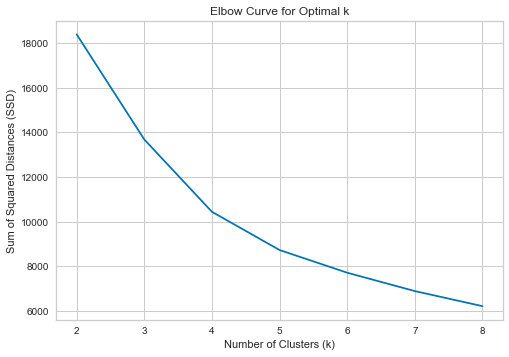

In [217]:
# Initialize an empty list to store the sum of squared distances (SSD) for each number of clusters
ssd = []

# Define a list of the number of clusters (k) to be evaluated
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Loop through each value of k in the range_n_clusters list
for num_clusters in range_n_clusters:
    # Create a KMeans object with the specified number of clusters and the maximum number of iterations set to 50
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    
    # Fit the KMeans model to the data (pca_df should be the transformed data after applying PCA)
    kmeans.fit(pca_df)
    
    # Calculate the sum of squared distances for the current number of clusters (num_clusters)and append it to the ssd list
    ssd.append(kmeans.inertia_)

# Plot the SSD values against the number of clusters to create an elbow curve
plt.plot(range_n_clusters, ssd)

# Add labels and title to the plot
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Curve for Optimal k')

# Show the plot
plt.show()

Use the Yellowbrick library's KElbowVisualizer to analyze the optimum number of clusters for KMeans clustering.

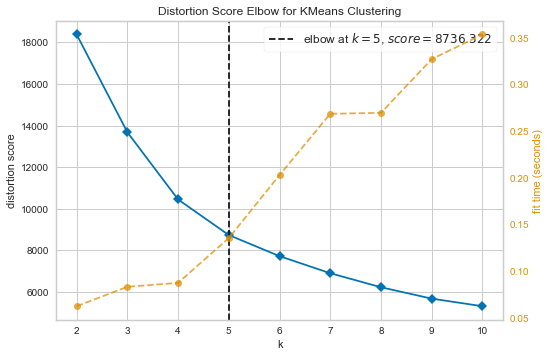

In [218]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()
plt.show()

### K-Means Clustering Analysis

In [219]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(pca_df)

KMeans(max_iter=50, n_clusters=5)

Some Basic Checks

In [220]:
len(kmeans.labels_)

2224

In [221]:
len(retail_df)

2224

In [222]:
# Assign Labels to the DF

retail_df['cluster_id'] = kmeans.labels_
retail_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Member_For,Total_Kids,FamilySize,Total_Purchases,Total_AcceptedCmp,Alcohol,Meat & Fish,Snacks & Fruits,cluster_id
0,0,0,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0.0,39,61,779,0,2,5,0.0,6,22,33,2
1,0,0,24594.0,1,0,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0.0,36,29,446,1,3,4,0.0,1,16,12,2
2,0,1,9548.0,1,0,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0.0,39,29,876,1,3,4,0.0,0,13,16,2
3,0,0,28249.0,0,0,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0.0,54,43,200,0,2,5,0.0,1,9,33,2
4,0,0,24882.0,1,0,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,0.0,37,80,844,1,3,4,1.0,1,39,40,2


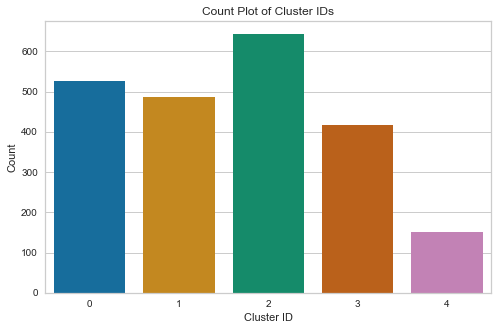

In [223]:
# Create a count plot for 'cluster_id'
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster_id', data=retail_df)
plt.title('Count Plot of Cluster IDs')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.show()

Larger cluster means we have a more dominant group and a smaller niche group. 

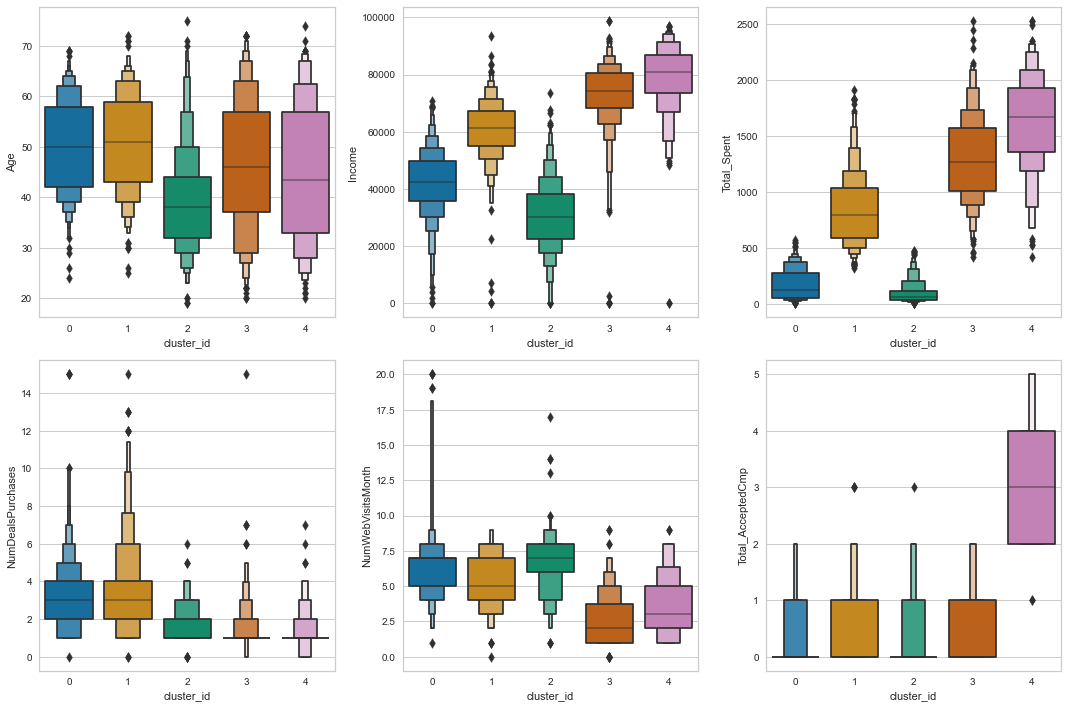

In [224]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxenplot(x='cluster_id', y='Age', data=retail_df, ax=axes[0, 0])
sns.boxenplot(x='cluster_id', y='Income', data=retail_df, ax=axes[0, 1])
sns.boxenplot(x='cluster_id', y='Total_Spent', data=retail_df, ax=axes[0, 2])
sns.boxenplot(x='cluster_id', y='NumDealsPurchases', data=retail_df, ax=axes[1, 0])
sns.boxenplot(x='cluster_id', y='NumWebVisitsMonth', data=retail_df, ax=axes[1, 1])
sns.boxenplot(x='cluster_id', y='Total_AcceptedCmp', data=retail_df, ax=axes[1, 2])

plt.tight_layout()
plt.show()

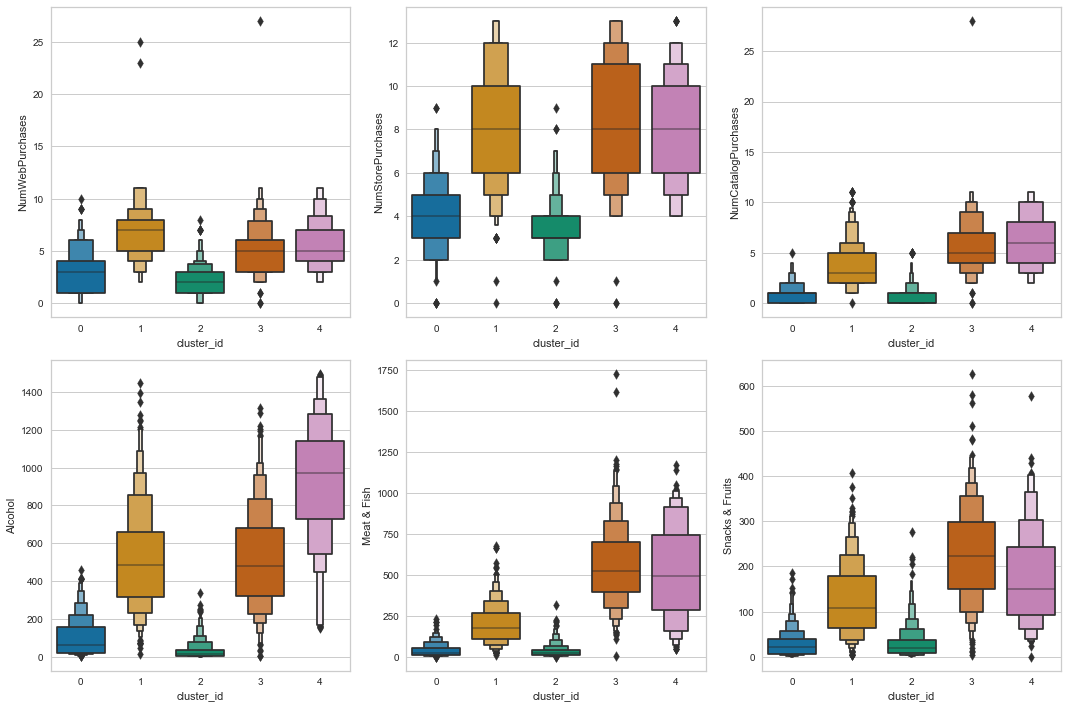

In [225]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxenplot(x='cluster_id', y='NumWebPurchases', data=retail_df, ax=axes[0, 0])
sns.boxenplot(x='cluster_id', y='NumStorePurchases', data=retail_df, ax=axes[0, 1])
sns.boxenplot(x='cluster_id', y='NumCatalogPurchases', data=retail_df, ax=axes[0, 2])
sns.boxenplot(x='cluster_id', y='Alcohol', data=retail_df, ax=axes[1, 0])
sns.boxenplot(x='cluster_id', y='Meat & Fish', data=retail_df, ax=axes[1, 1])
sns.boxenplot(x='cluster_id', y='Snacks & Fruits', data=retail_df, ax=axes[1, 2])

plt.tight_layout()
plt.show()

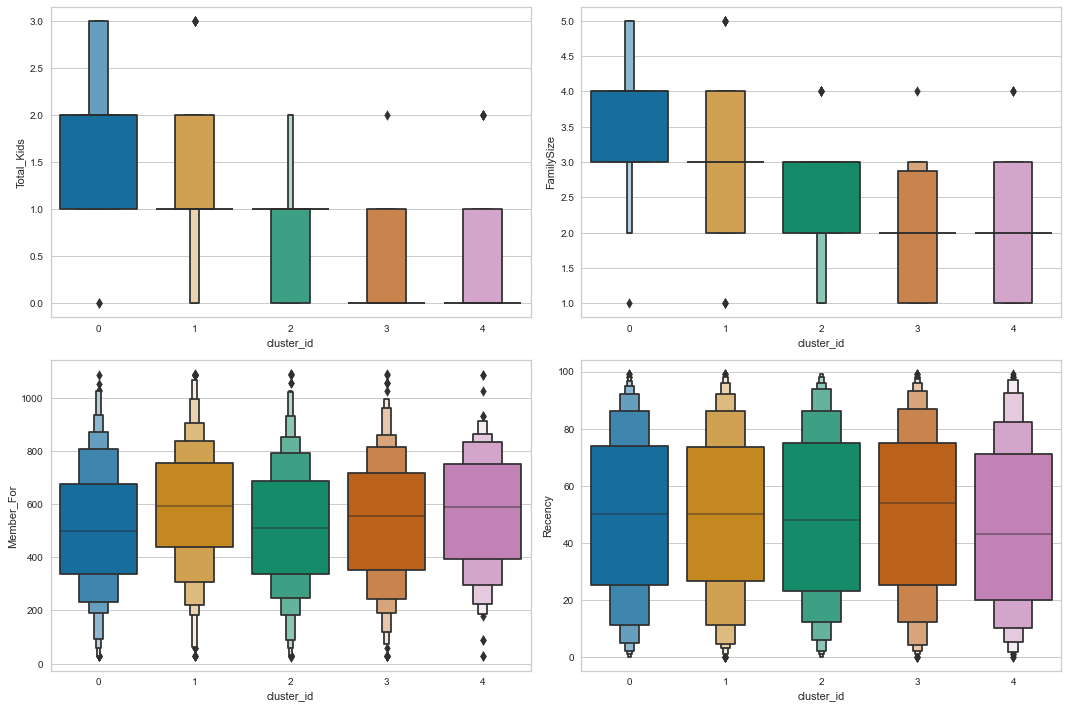

In [230]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxenplot(x='cluster_id', y='Total_Kids', data=retail_df, ax=axes[0, 0])
sns.boxenplot(x='cluster_id', y='FamilySize', data=retail_df, ax=axes[0, 1])
sns.boxenplot(x='cluster_id', y='Member_For', data=retail_df, ax=axes[1, 0])
sns.boxenplot(x='cluster_id', y='Recency', data=retail_df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

### Insights

- Cluster 4: High Income High Spenders
- Cluster 3: High Income Avg Spenders
- Cluster 1: Avg Income Avg Spenders
- Cluster 0: Avg Income Low Spenders
- Cluster 2: Low Income Low Spenders


#### Segment Behaviour and Recommendations are the PowerPoint Presentation